In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
data = pd.read_excel("KursnaLista.xlsx")

<Axes: >

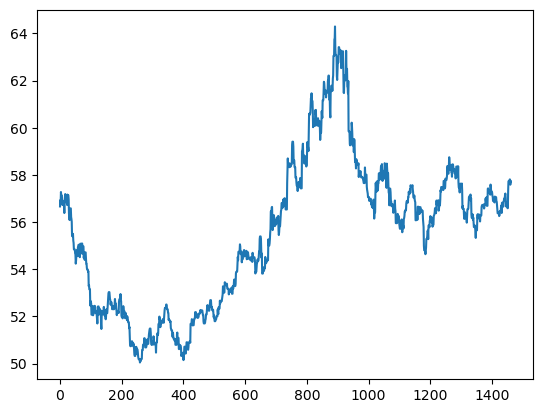

In [5]:
data.Rate.plot()